In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline


In [110]:
air_pass=pd.read_csv("https://raw.githubusercontent.com/jymishra/datasets/master/AirPassengers.csv")

In [111]:
air_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
Week_num                        80 non-null int64
Passengers                      80 non-null int64
Promotion_Budget                80 non-null int64
Service_Quality_Score           80 non-null float64
Holiday_week                    80 non-null object
Delayed_Cancelled_flight_ind    80 non-null object
Inter_metro_flight_ratio        80 non-null float64
Bad_Weather_Ind                 80 non-null object
Technical_issues_ind            80 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 5.7+ KB


In [112]:
air_pass.shape

(80, 9)

In [113]:
air_pass.describe()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
count,80.0000,80.000000,8.000000e+01,80.000000,80.000000
mean,40.5000,44745.025000,6.254223e+05,2.781168,0.693000
std,23.2379,11267.155215,1.565143e+05,1.000204,0.158045
min,1.0000,28700.000000,3.656800e+05,0.855360,0.380000
25%,20.7500,36424.000000,5.178915e+05,1.931580,0.610000
50%,40.5000,43144.000000,5.979190e+05,3.108120,0.720000
75%,60.2500,48864.000000,6.885935e+05,3.608883,0.802500
max,80.0000,81228.000000,1.108254e+06,4.000000,0.900000


In [114]:
air_pass.corr()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
Week_num,1.000000,0.412820,0.392003,-0.394892,0.188979
Passengers,0.412820,1.000000,0.965851,-0.886530,0.491947
Promotion_Budget,0.392003,0.965851,1.000000,-0.843382,0.531449
Service_Quality_Score,-0.394892,-0.886530,-0.843382,1.000000,-0.443437
Inter_metro_flight_ratio,0.188979,0.491947,0.531449,-0.443437,1.000000


In [115]:
air_pass.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


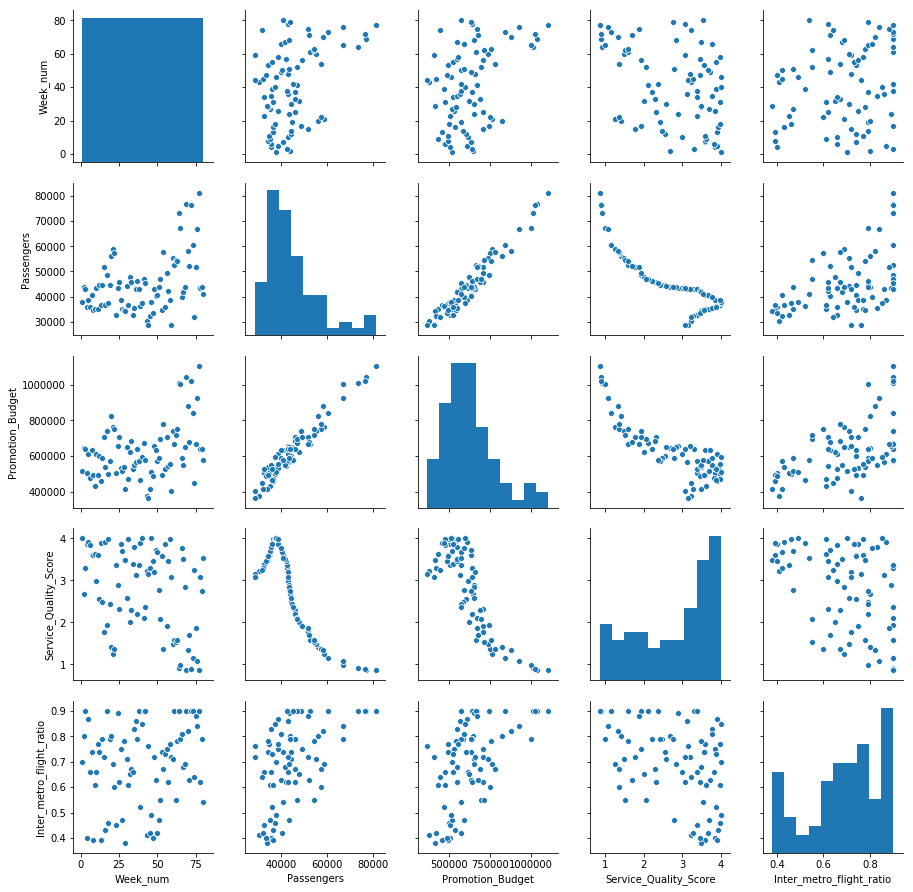

In [116]:
sns.pairplot(air_pass)

# Clearly there is a correlation between no of passeneges and Promo budget

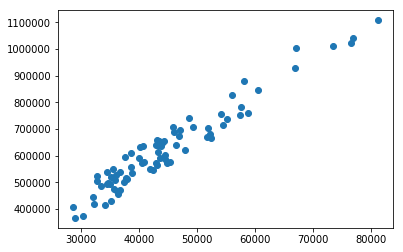

In [117]:
plt.scatter(air_pass.Passengers,air_pass.Promotion_Budget)

In [118]:
np.corrcoef(air_pass.Passengers,air_pass.Promotion_Budget)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

There is a Linear Correlation between two which is quite high ,Now will apply Linear Regresion to predict no of passenger for a given budget

In [119]:
X=air_pass.Promotion_Budget

In [120]:
y=air_pass.Passengers

In [121]:
X.head()

0    517356
1    646086
2    638330
3    506492
4    609658
Name: Promotion_Budget, dtype: int64

In [122]:
y.head()

0    37824
1    43936
2    42896
3    35792
4    38624
Name: Passengers, dtype: int64

In [123]:
X1=sm.add_constant(X)

In [124]:
X1.head()

,const,Promotion_Budget
0,1.0,517356
1,1.0,646086
2,1.0,638330
3,1.0,506492
4,1.0,609658


We add constant as Y=a+bx

In [125]:
lm=sm.OLS(y,X1)

In [126]:
fitted=lm.fit()

In [127]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Tue, 20 Nov 2018   Prob (F-statistic):           1.66e-47
Time:                        22:21:37   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1259.6058   1361.071      0.925      0.358   -1450.078    3969.290
Promotion_Budget     0.0695      0.002     32.923      0.000       0.065       0.074
==============================================================================
Omnibus:                       26.624   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.188
Skew:                          -0.128   Prob(JB):                       0.0747
Kurtosis:                       1.779   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
type(fitted)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [129]:
fitted.fittedvalues.head()

0    37231.205694
1    46181.762081
2    45642.489842
3    36475.835193
4    43648.934706
dtype: float64

All fitted values Y value are stored in fittedvalues

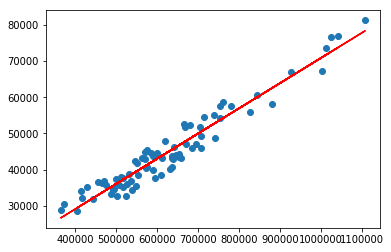

In [130]:
plt.scatter(air_pass.Promotion_Budget,air_pass.Passengers)
plt.plot(air_pass.Promotion_Budget,fitted.fittedvalues,c='r')

In [131]:
fitted.predict([1,65000])

array([5779.03537577])

In [132]:
fitted.predict([1,70000])

array([6126.68380222])